In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

# Aufgabe 1

Die zu untersuchenden Funktionen und Funktionen für die obere und untere Grenze des 1% Fehler-Intervalls der algebraischen Lösung $\frac{2}{3}$:

In [2]:
def f(x):
    return (x**3+1/3)-(x**3-1/3)



def g(x):
    return ((3+x**3*1/3)-(3-x**3*1/3))/x**3



def plus(x):
    return np.ones(len(x)) * (2/3 + 2/(3*100)) +x*0



def minus(x):
    return np.ones(len(x)) * (2/3 - 2/(3*100)) +x*0



## a) & b)

Um zu bestimmen wann eine Abweichung von mehr als einem Prozent stattfindet wird mit folgenden Schleifen der erste Wert ausgegeben bei dem dies stattfindet. Dabei wird ignoriert, dass dies mehrfach passsiert und Intervalle existieren bei denen der Fehler wieder kleiner wird.

Für f(x) wird dabei einfach für die Summationsindizes die Abweichung probiert. Für g(x) wird dabei mit dem Inversen der Indizes gearbeitet, da dort die größte Abweichung um 0 herum zu finden ist, da dort durch sehr kleine Zahlen geteilt wird, wodurch der Einfluss viel größer wird.

In [3]:
for i in range(1,50000):
    if f(i)>=2/3+1/150 or f(i)<=2/3-1/150:
        print('Erste Abweichungen der Funktion f, angenähert von 0: ',i,"\n")
        break
        
        
        
for n in range(1,50000):
    i = 1/n
    if g(i)>=2/3+1/150 or g(i)<=2/3-1/150:
        print('Erste Abweichungen der Funktion g, angenähert von den positiven reelen Zahlen: ',i)
        break

Erste Abweichungen der Funktion f, angenähert von 0:  41286 

Erste Abweichungen der Funktion g, angenähert von den positiven reelen Zahlen:  4.040240798351582e-05


Ab x >= 41286 beginnt ein Intervall bei dem für f(x) die Abweichung größer ist als 1%. Aus Symmetrie gründen gilt das auch für x <= -41286. 

Für g(x) gilt dasselbe für x <= 4.040240798351582e-05 und x >= -4.040240798351582e-05.

Diese Werte sind aber nur der Beginn eines Intervalls, da wie im Aufgabenteil c) noch mehr Intervalle existieren.


Für Werte bei denen die Funktion 0 wird, wird äquivalent vorgegangen.

In [4]:
for i in range(1,200000):
    if f(i)==0:
        print('Erste Nullstelle der Funktion f, angenähert von 0: ',i,"\n")
        break
        
        
        
for n in range(1,200000):
    i = 1/n
    if g(i)==0:
        print('Erste Nullstelle g, angenähert von den positiven reelen Zahlen: ',i)
        break

Erste Nullstelle der Funktion f, angenähert von 0:  165141 

Erste Nullstelle g, angenähert von den positiven reelen Zahlen:  8.733471904420884e-06



Für f(x) ergibt sich damit also ab $x = \pm 165141$ Werte die Null sind und für g(x) bei $x = \pm 8.733471904420884e-06$

## d)

Wenn man nun f(x), g(x) und die Funktionen für die oberen und unteren Grenzen plottet lässt sich gut erkennen wo die Werte das Fehlerintervall verlassen.


#### Funktion f(x):

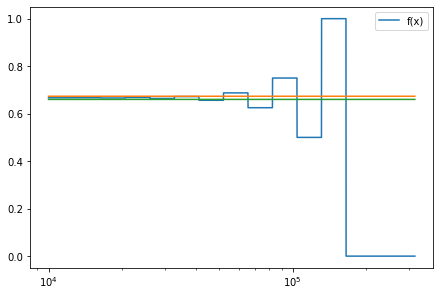

In [5]:
t1 = np.logspace(4,5.5, 10000) #logspace zum plotten



plt.figure(constrained_layout=True)
plt.plot(t1,f(t1), label="f(x)")
plt.plot(t1,plus(t1))
plt.plot(t1,minus(t1))
plt.legend(loc= 'best')
plt.xscale("log")


Man kann in dieser Grafik erkennen, dass für große x die Funktion null wird, da durch Rundungen die Addition der Konstanten irgendwann keinen Effekt mehr hat.
Die Intervalle für die die Abweichung mehr als 1% entspricht kann man hier auch erkennen.


#### Funktion g(x):

In [ ]:
t2 = np.logspace(-6,-4, 10000) #logspace zum plotten



plt.figure(constrained_layout=True)
plt.plot(t2,g(t2), label="g(x)")
plt.plot(t2,plus(t2))
plt.plot(t2,minus(t2))
plt.legend(loc= 'best')
plt.xscale("log")


Hier sieht man das für sehr kleine Werte von x die FUnktion den Wert 0 annimmt. Auch die Intervalle bei denen die Funktion größere Fehler hat sind zu erkennen.


## d)

#### Für die Funktion f(x):

In [ ]:
x_32 = np.logspace(1,5.5, 10000, dtype = "float32")

x_64 = np.logspace(4,5.5, 10000, dtype = "float64")


plt.tight_layout()
plt.subplot(1,2,1)
plt.plot(x_32,f(x_32),label="f(x) mit 32bit")
plt.plot(x_32,plus(x_32))
plt.plot(x_32,minus(x_32))
plt.legend(loc= 'best')
plt.xscale("log")




plt.subplot(1,2,2)
plt.plot(x_64,f(x_64),label="f(x) mit 64bit")
plt.plot(x_64,plus(x_64))
plt.plot(x_64,minus(x_64))
plt.legend(loc= 'best')
plt.xscale("log")


#### Für die Funktion g(x):

In [ ]:
x_32 = np.logspace(-6,-1, 10000, dtype = "float32")

x_64 = np.logspace(-6,-4, 10000, dtype = "float64")


plt.tight_layout()
plt.subplot(1,2,1)
plt.plot(x_32,g(x_32),label="f(x) mit 32bit")
plt.plot(x_32,plus(x_32))
plt.plot(x_32,minus(x_32))
plt.legend(loc= 'best')
plt.xscale("log")




plt.subplot(1,2,2)
plt.plot(x_64,g(x_64),label="f(x) mit 64bit")
plt.plot(x_64,plus(x_64))
plt.plot(x_64,minus(x_64))
plt.legend(loc= 'best')
plt.xscale("log")


Wie zu erwarten sieht man, dass die Funktionen die mit 32bit Zahlen geplottet werden, weiter entfernt von den Grenzwerten schon starke Abweichungen zeigen. Dies ist darauf zurückzuführen, dass dort die Zahlen, aufgrund der wenigen Stellen, ungenauer sind.